In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import countplot
import seaborn as sns
from matplotlib.pyplot import figure, show
from datetime import datetime
import numpy as np
import matplotlib
matplotlib.style.use('ggplot') # Look Pretty

Pipeline incident in Alberta leads to unimaginable consequences. Below is a dataset of Alberta pipeline incident recorded between the years of 1975 to 2013. I want to see what pipeline source has the most and least incidents and how long it takes to complete the incident. Some other parameters will be looked closer 
and to quanitfy as well. Graphs will display the results of the investigation. By investigating deeper into the incident is the key to unlock some of the mysteries.
Please check out my tableau public for beautiful visualizations I created for this dataset.
https://public.tableau.com/profile/howie.qian


In [2]:
# Read the file in csv
df = pd.read_csv("PipelineSpillsAB.csv") 
# create a new dataframe with the necessary columns
df1 = df[['IncidentNumber', 'Latitude', 'Longitude', 'IncidentDate', 'IncidentNotificationDate', 'IncidentCompleteDate',
'Source', 'CauseType', 'FieldCentre', 'PublicEvacuatedCount', 'ReleaseCleanupDate' ]]

#Displaying top 5 rows
df1.head()

,IncidentNumber,Latitude,Longitude,IncidentDate,IncidentNotificationDate,IncidentCompleteDate,Source,CauseType,FieldCentre,PublicEvacuatedCount,ReleaseCleanupDate
0,19940265,49.001033,-110.007850,1/15/1994,1/15/1994,1/16/1994,Oil Well,Conversion,Medicine Hat,NaN,1/16/1994
1,20070857,49.062800,-110.754483,3/29/2007,3/29/2007,6/12/2007,Natural Gas Pipeline,Internal corrosion,Medicine Hat,0.0,3/30/2007
2,20080779,49.062800,-110.754483,3/21/2008,3/21/2008,4/18/2008,Natural Gas Pipeline,Internal corrosion,Medicine Hat,0.0,4/17/2008
3,20080862,49.062800,-110.754483,4/3/2008,4/3/2008,4/18/2008,Natural Gas Pipeline,Internal corrosion,Medicine Hat,0.0,NaN
4,20022806,49.048200,-110.882317,11/30/2002,11/30/2002,11/30/2002,Crude Oil Group Battery,Conversion,Medicine Hat,NaN,11/30/2002


In [3]:
df1.info()
#We can see the dataset has 61587 incidents recorded.
#Some columns have missing values but not many

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61587 entries, 0 to 61586
Data columns (total 11 columns):
IncidentNumber              61587 non-null int64
Latitude                    61584 non-null float64
Longitude                   61584 non-null float64
IncidentDate                61587 non-null object
IncidentNotificationDate    61587 non-null object
IncidentCompleteDate        60850 non-null object
Source                      61541 non-null object
CauseType                   61404 non-null object
FieldCentre                 61587 non-null object
PublicEvacuatedCount        8859 non-null float64
ReleaseCleanupDate          58897 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


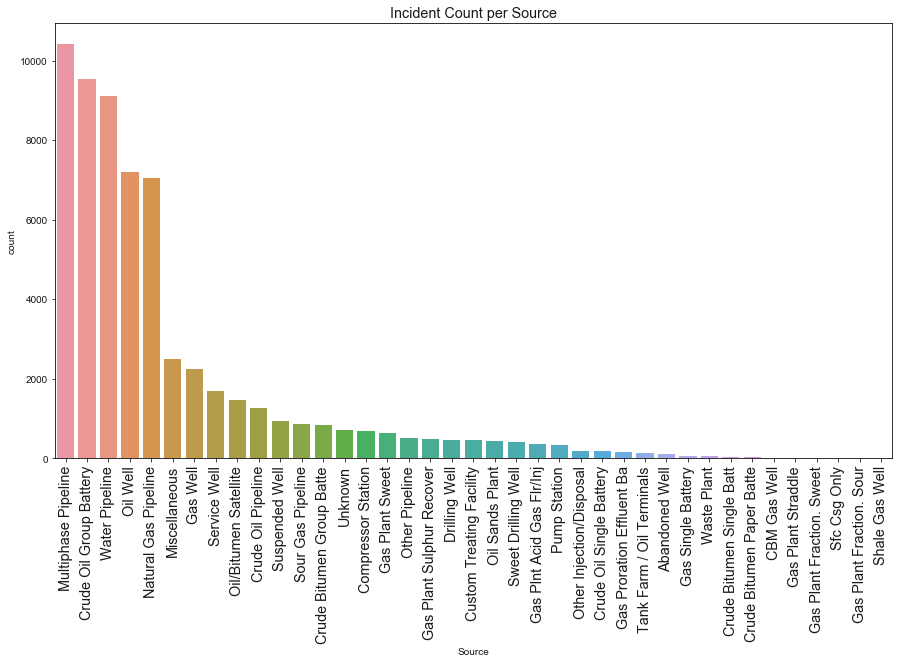

In [4]:
# perform a count plot on the 'Source' column to count the incident frequency from each source
width = 15
height = 8
figure(figsize = (width,height))
ax = sns.countplot(x = df1['Source'], data = df1, order = df1['Source'].value_counts().index)
sns.set(rc={"figure.figsize": (8, 4)})

ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 'large')
ax.set_title("Incident Count per Source", fontsize = 'large')
ax
show()

We can see that the Multiphase Pipeline, Crude Oil Group Battery, Water Pipeline, Oil Well and Natural Gas Pipeline have the most incidents. These are the most common pipelines in Alberta. Next we will look into the incident notification delay and how long it takes to complete and recover the incident. The columns are the 'IncidentDate', 'IncidentNotificationDate' and 'IncidentCompleteDate'

In [5]:
#Convert into date and time type, and format the date columns in floats from datetime type
date_Incident = pd.to_datetime(df['IncidentDate'],
                              format='%m/%d/%Y')

In [6]:
date_Notification = pd.to_datetime(df1['IncidentNotificationDate'], format = '%m/%d/%Y')

In [7]:
date_IncidentComplete = pd.to_datetime(df1['IncidentCompleteDate'], format = '%m/%d/%Y')

In [8]:
date_release = pd.to_datetime(df1['ReleaseCleanupDate'], format = '%m/%d/%Y')

In [9]:
df1['NotificationDelay'] =  date_Notification.sub(date_Incident, axis = 0)
df1['IncidentDelay'] = date_IncidentComplete.sub(date_Incident, axis = 0)

C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df1['NotificationDelay'] = df1['NotificationDelay']/ np.timedelta64(1, 'D')
df1['IncidentDelay'] = df1['IncidentDelay']/np.timedelta64(1, 'D')
                                                        

C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#Check any observation which has a negative day units. These are the records contain no dates or false dates recorded.
(df1['IncidentDelay']<0).any()

True

Below is the notification delay statistical summary. The units are in days. The mean notification delay is 2.4 days
The 75% quartile is zero indicates majority, three quarters of the notification delay is within one day. 

In [153]:
df1['NotificationDelay'].describe()

count    61585.000000
mean         2.418414
std         89.744444
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10469.000000
Name: NotificationDelay, dtype: float64

The 'IncidentDelay' column is the overall time delay from incident begin until incident complete. Majority of the
days to complete the incident is within 111 days. The mean delay is around 300 days.

In [13]:
df1 = df1.drop(df1[df1.IncidentDelay <0].index)
df1.IncidentDelay.describe()
#I dropped the observations which contain no incident completion dates or false incident completion dates recorded
#The total count of incidents delay correctly recorded is 60848.

count    60848.00000
mean       298.77927
std        914.06298
min          0.00000
25%          1.00000
50%         10.00000
75%        111.00000
max      18269.00000
Name: IncidentDelay, dtype: float64

The counts of notification delay and incident completion days are ploted in bar charts below. The X-axis is the days range and Y-axis is the quantity counts. Both charts are in descending order from highest to lowerst counts.

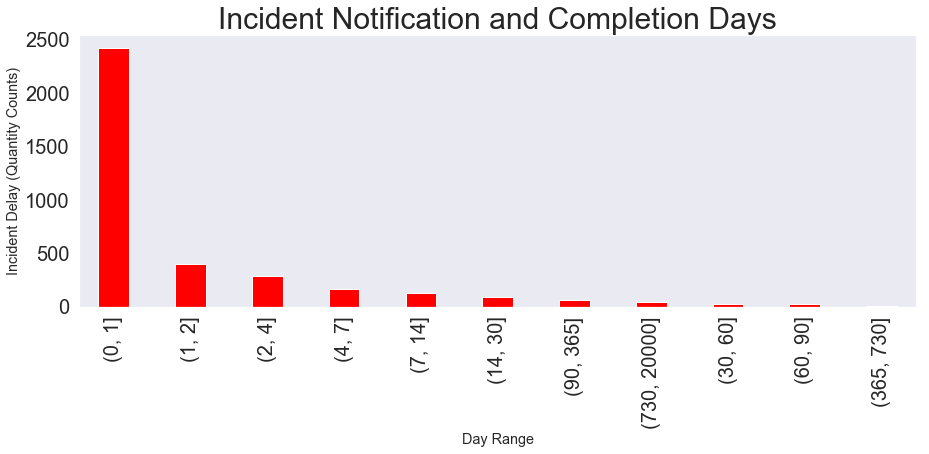

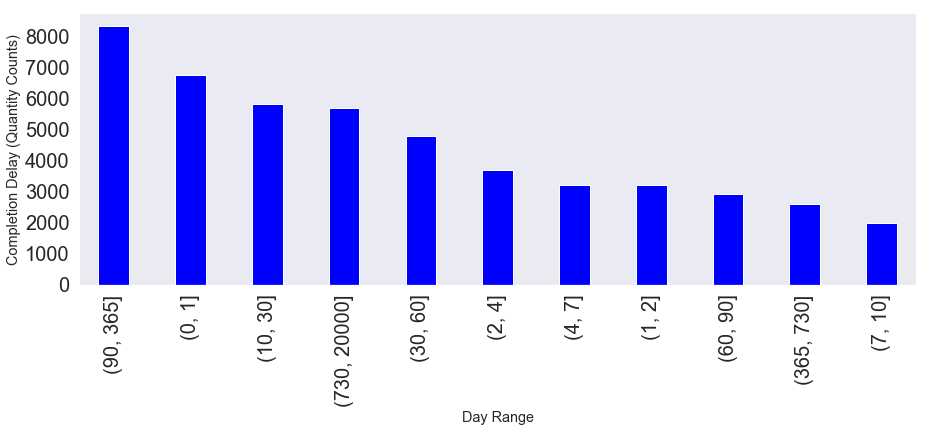

In [14]:
IND = df1[['NotificationDelay']].apply(lambda x: pd.cut(x, 
bins=[0, 1, 2, 4, 7, 14, 30, 60, 90, 365, 730, 20000]).value_counts())
ICD = df1[['IncidentDelay']].apply(lambda x: pd.cut(x, 
bins=[0, 1, 2, 4, 7, 10, 30, 60, 90, 365, 730, 20000]).value_counts())

bins = [0, 1, 2, 4, 7, 14, 30, 60, 90, 365, 730, 20000]
ax = IND.plot.bar(legend = False,  figsize=(15,5), grid = None, color = 'red', 
                  title = 'Incident Notification and Completion Days', width = 0.4, fontsize = 20)
bx = ICD.plot.bar(legend = False,  figsize=(15,5), grid = None,  color = 'blue', width = 0.4, fontsize = 20)

ax.set_ylabel('Incident Delay (Quantity Counts)', fontsize = 'large')
bx.set_ylabel('Completion Delay (Quantity Counts)', fontsize = 'large')

ax.set_xlabel("Day Range", fontsize='large')
bx.set_xlabel("Day Range", fontsize='large')
ax.title.set_size(30)
ax.grid(b = None)
bx.grid(b = None)

plt.show()

We see that many of the incident was notified within 1 day. Most of incident completion days are between three months to one year. Some incident completed within one day, and others are within two days, a week and more than 2 years.

In [154]:
df1_year1 = df1[~(df1.IncidentDelay > 365)]
df1_year1['IncidentDelay'].describe()

count    52539.000000
mean        41.353509
std         73.554529
min          0.000000
25%          1.000000
50%          5.000000
75%         47.000000
max        365.000000
Name: IncidentDelay, dtype: float64

There are 52539 incidents completed within a year. There are about 60848 incidents counts in this
data sets. That is more than 85% of the incident dataset!

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text xticklabel objects>)

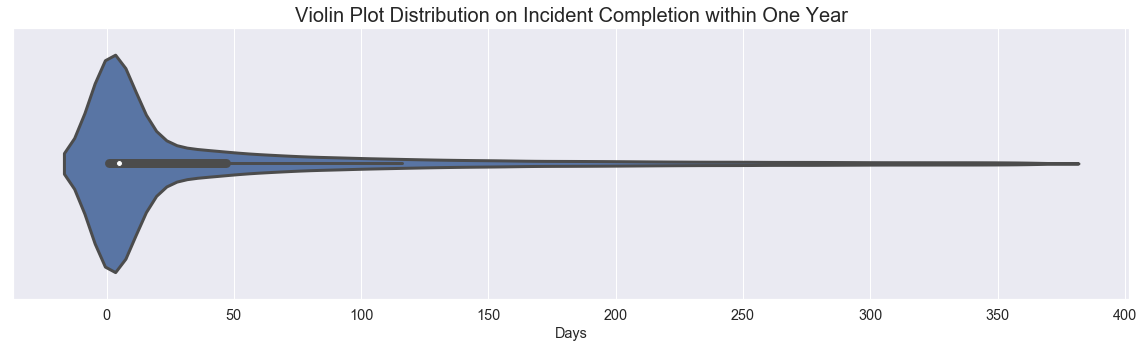

In [16]:
plt.figure(figsize=(20,5))
cx = sns.violinplot(x = df1_year1['IncidentDelay'], linewidth = 3, fontsize = 20)
plt.xlabel('Days', fontsize = 'large')
plt.title('Violin Plot Distribution on Incident Completion within One Year', fontsize = 20)
plt.xticks(fontsize = 'large')

In [17]:
df1_year2 = df1[~(df1.IncidentDelay > 730)]
df1_year2 = df1_year2[~(df1_year2.IncidentDelay <= 365)]
df1_year2['IncidentDelay'].describe()

count    2600.000000
mean      520.237308
std       106.505634
min       366.000000
25%       427.000000
50%       506.000000
75%       609.000000
max       730.000000
Name: IncidentDelay, dtype: float64

(array([300., 350., 400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 10 Text xticklabel objects>)

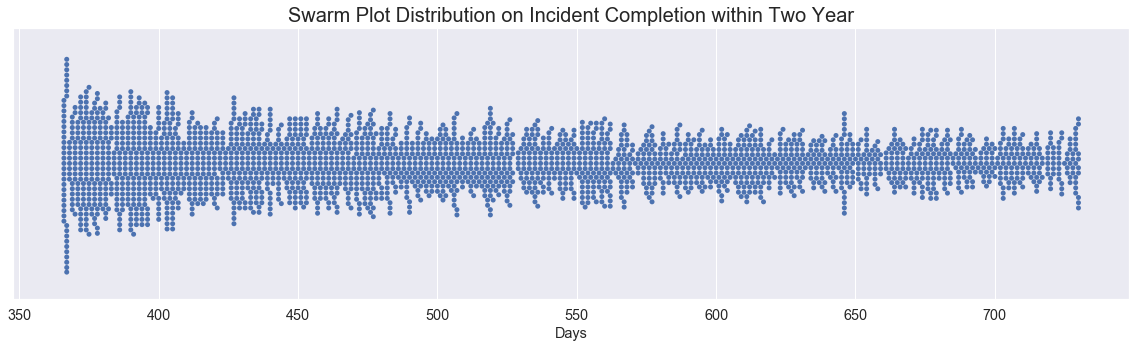

In [18]:
plt.figure(figsize=(20,5))
dx = sns.swarmplot(x = df1_year2['IncidentDelay'])
plt.xlabel('Days', fontsize = 'large')
plt.title('Swarm Plot Distribution on Incident Completion within Two Year', fontsize = 20)
plt.xticks(fontsize = 'large')

#The distribution after one year and before the end of second year is evenly distributed. 
#This graph only accounts for 4.2 percent of the total incidents!

The distribution after one year and before the end of second year is evenly distributed. 
This graph only accounts for 4.2 percent of the total incidents!

In [19]:
df1_late = df1[~(df1.IncidentDelay <= 730)]
df1_late.IncidentDelay.describe()

count     5709.000000
mean      2566.970047
std       1753.184038
min        731.000000
25%       1127.000000
50%       1906.000000
75%       3704.000000
max      18269.000000
Name: IncidentDelay, dtype: float64

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]), <a list of 10 Text xticklabel objects>)

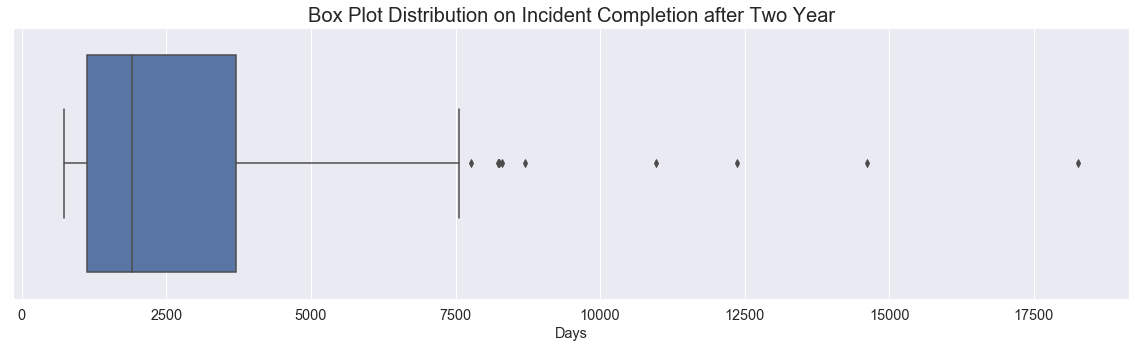

In [20]:
plt.figure(figsize=(20,5))
ex = sns.boxplot(x = df1_late['IncidentDelay'])
plt.xlabel('Days', fontsize = 'large')
plt.title('Box Plot Distribution on Incident Completion after Two Year', fontsize = 20)
plt.xticks(fontsize = 'large')
#The plot only accounts for 9.4 percent of the incident recorded in the dataset. Some outliers exist after 7500 days to
#18000 plus days. That is 20 years to 50 years! 

The plot only accounts for 9.4 percent of the incident recorded in the dataset. Some outliers exist after 7500 days to
18000 plus days. That is between 20 years to 50 years! 

In [21]:
dfs = df1[df1['IncidentDelay'] > 7500]
dfs
#The records show the incident delays higher than 7500 days which is roughly 20 years. Uncertain whether the recorded 
#information is accurate. Majority of the sources are oil and few are water and multiphase pipelines.

,IncidentNumber,Latitude,Longitude,IncidentDate,IncidentNotificationDate,IncidentCompleteDate,Source,CauseType,FieldCentre,PublicEvacuatedCount,ReleaseCleanupDate,NotificationDelay,IncidentDelay
7517,19750543,50.591900,-111.489850,5/1/1975,5/1/1975,1/27/1998,Crude Oil Group Battery,Conversion,Medicine Hat,NaN,1/27/1998,0.0,8307.0
12925,19750755,51.941667,-111.348750,6/16/1975,6/16/1975,1/1/1998,Water Pipeline,Conversion,Wainwright,NaN,1/1/1998,0.0,8235.0
13377,19962698,51.984500,-110.841183,11/28/1966,11/28/1966,11/29/1996,Oil Well,Conversion,Wainwright,NaN,11/29/1996,0.0,10959.0
17168,20040830,52.337750,-113.072800,5/11/1975,1/8/2004,3/13/2009,Other Injection/Disposal,Inadequate procedure,Red Deer,NaN,1/8/2004,10469.0,12360.0
24253,19770475,52.972283,-110.545100,4/15/1977,4/15/1977,1/1/1998,Multiphase Pipeline,Conversion,Wainwright,NaN,1/1/1998,0.0,7566.0
37099,20032669,53.763933,-110.763050,6/7/1983,3/25/2003,9/7/2004,Crude Bitumen Group Batte,Inadequate procedure,BONNYVILLE,NaN,NaN,7231.0,7763.0
39615,19951905,53.936333,-113.660300,1/1/1970,1/1/1970,7/29/1992,Oil Well,Conversion,St. Albert,NaN,7/29/1992,0.0,8245.0
39616,19951904,53.939933,-113.654100,1/1/1970,1/1/1970,7/29/1992,Oil Well,Conversion,St. Albert,NaN,7/29/1992,0.0,8245.0
49783,19750890,54.906700,-117.214167,7/21/1975,7/21/1975,5/19/1999,Crude Oil Group Battery,Conversion,Grande Prairie,NaN,5/19/1999,0.0,8703.0
53775,19940164,55.714050,-115.809133,2/4/1944,2/4/1944,2/10/1994,Miscellaneous,Conversion,St. Albert,NaN,2/10/1994,0.0,18269.0


The records above show the incident delays higher than 7500 days which is roughly 20 years. Uncertain whether the recorded information is accurate. Majority of the sources are oil and few are water and multiphase pipelines.

In [156]:
#We will look the incident delay versus source
df2 = df1.groupby('Source')['IncidentDelay'].mean()

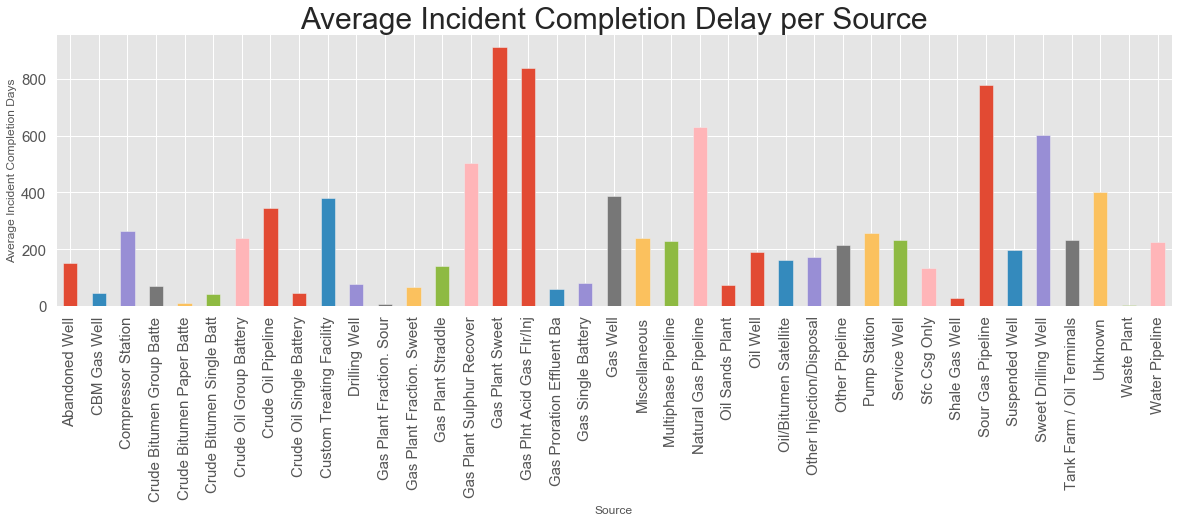

In [157]:
plt.figure(figsize=(20,5))
IncidentMean = df2.plot.bar(title = "Average Incident Completion Delay per Source", fontsize = 15)
IncidentMean.set_xlabel('Source', fontsize = 'large')
IncidentMean.set_ylabel('Average Incident Completion Days', fontsize = 'large')
IncidentMean.title.set_size(30)

According to the plot, we can see that gas plant sweet, natural and sour gas pipelines have the highest days 
to complete the incident. The repair days for these pipelines are longer.

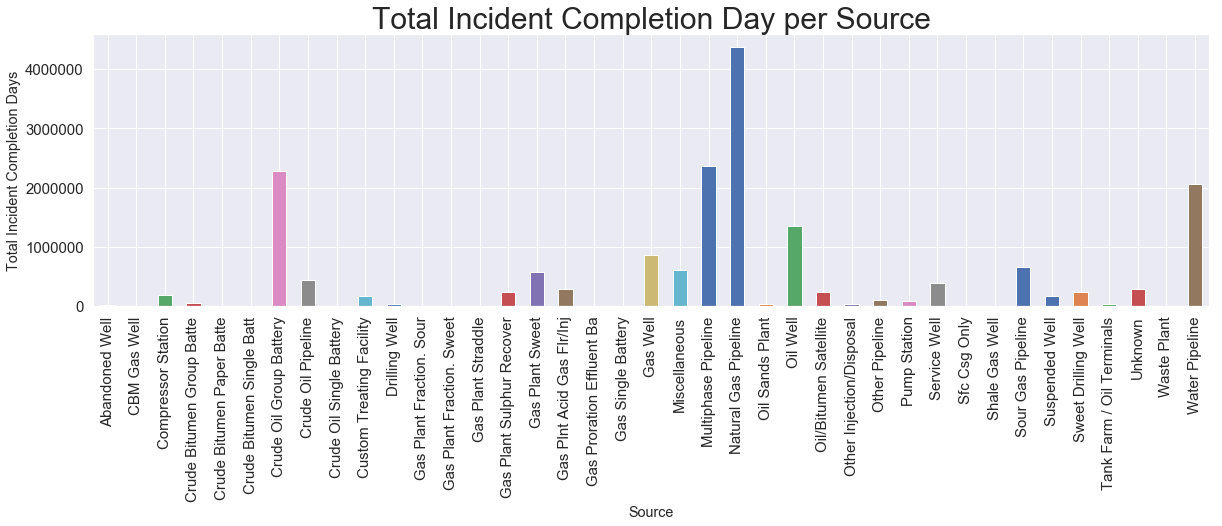

In [24]:
plt.figure(figsize=(20,5))
df3 = df1.groupby('Source')['IncidentDelay'].sum()
IncidentCount = df3.plot.bar(title = "Total Incident Completion Day per Source", fontsize = 15)
IncidentCount.set_xlabel('Source', fontsize = 'large')
IncidentCount.set_ylabel('Total Incident Completion Days', fontsize = 'large')
IncidentCount.title.set_size(30)

The natural gas pipeline, multiphase pipeline, oil group line, water lines require the most incident completion days.
The crude oil pipelines and oil wells have more incident counts but shorter incident completion days. 
The gas pipelines have lower incident counts but takes longer to repair.

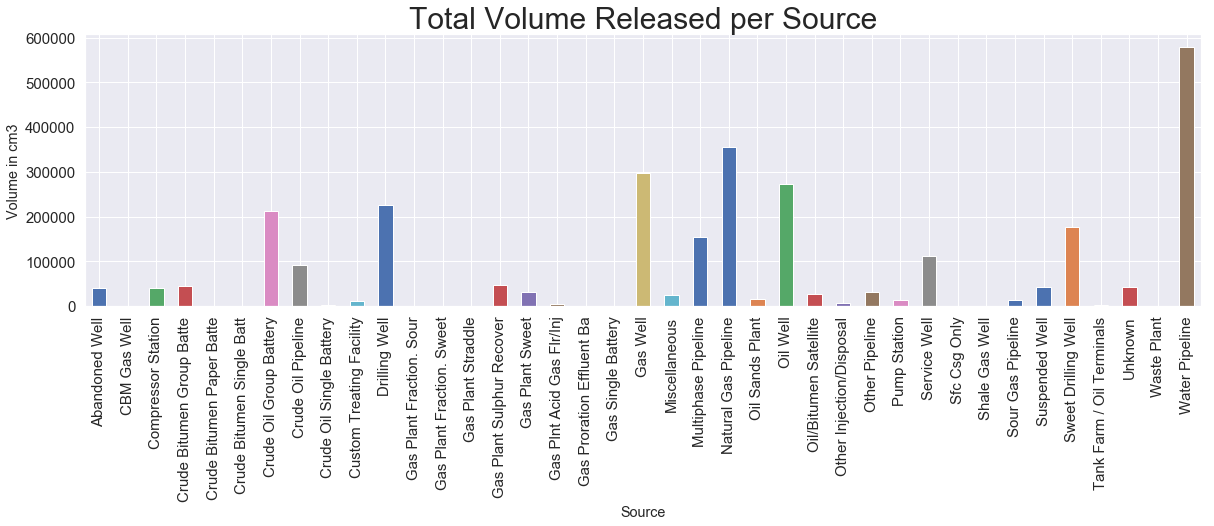

In [25]:
df['TotalVolumeReleased'] = df[['Volume Released', 'Volume Released 2', 'Volume Released 3', 'Volume Released 4']].sum(axis = 1)

df4 = pd.merge(df[['IncidentNumber', 'TotalVolumeReleased']], df1, on = 'IncidentNumber')
df4 = df4[~(df4.TotalVolumeReleased < 0)]
df5 = df4.groupby('Source')['TotalVolumeReleased'].sum()
plt.figure(figsize=(20,5))
dx = df5.plot.bar(title = "Total Volume Released per Source", fontsize = 15)
dx.set_xlabel('Source', fontsize = 'large')
dx.set_ylabel('Volume in cm3', fontsize = 'large')
dx.title.set_size(30)


As we can see,  Water Pipeline, Natural Gas Pipelines and various wells release the highest volumes of substances.
Water lines has the most releases in terms of volume.

What is the function of a field centre. There are 9 field centres in total. If a field centre is where the trades and operators live then maybe finding the field centre with optimum travel distance would be more efficient by saving commute time. Below shows a map of the field centre and the incident locations.

In [142]:
#Drop Nan values in Latitude and Longitude, not including latitudes and longitudes with Nans
df4 = df4[np.isfinite(df['Latitude'])]
df4 = df4[np.isfinite(df['Longitude'])]
df4.dropna(subset=['Latitude'], how='all', inplace = True)
df4.dropna(subset=['Longitude'], how ='all', inplace = True)
df4['FieldCentre']=df4['FieldCentre'].replace(to_replace= ['BONNYVILLE', 'DRAYTON VALLEY', 'GRANDE PRAIRIE', 'HIGH LEVEL', 'MEDICINE HAT', 'MIDNAPORE', 'RED DEER', 'ST. ALBERT', 'WAINWRIGHT'],
                          value = ['Bonnyville', 'Drayton Valley', 'Grande Prairie', 'High Level', 'Medicine Hat', 'Midnapore', 'Red Deer', 'St. Albert', 'Wainwright'])
df4.FieldCentre.unique()

C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\alloq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


array(['Medicine Hat', 'Midnapore', 'Bonnyville', 'Red Deer',
       'St. Albert', 'Drayton Valley', 'Wainwright', 'Grande Prairie',
       'High Level'], dtype=object)

Now, I am going to plot the field center locations. First gather the coordinates of the Field Centres

In [140]:
fields = {'Fields':['Bonnyville', 'Drayton Valley', 'Grande Prairie', 'High Level', 'Medicine Hat', 'Midnapore', 'Red Deer', 'St.Albert', 'Wainwright'],  
          'Latitude':['54.268811', '53.221744', '55.169313', '58.516342', '50.039728', '50.911563', '52.266675', '53.630670', '52.833409' ], 
          'Longitude':['-110.725044', '-114.977572', '-118.798398', '-117.133375', '-110.670037', '-114.051823', '-113.805466', '-113.621178', '-110.849730' ]}

fields_pd = pd.DataFrame.from_dict(fields)
fields_pd[['Latitude', 'Longitude']] = fields_pd[['Latitude', 'Longitude']].apply(pd.to_numeric)
fields_pd.info()
fields_pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Fields       9 non-null object
Latitude     9 non-null float64
Longitude    9 non-null float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes


,Fields,Latitude,Longitude
0,Bonnyville,54.268811,-110.725044
1,Drayton Valley,53.221744,-114.977572
2,Grande Prairie,55.169313,-118.798398
3,High Level,58.516342,-117.133375
4,Medicine Hat,50.039728,-110.670037
5,Midnapore,50.911563,-114.051823
6,Red Deer,52.266675,-113.805466
7,St.Albert,53.630670,-113.621178
8,Wainwright,52.833409,-110.849730


Plot all the Incident Locations, a better view would be my other project in the Tableau Public web

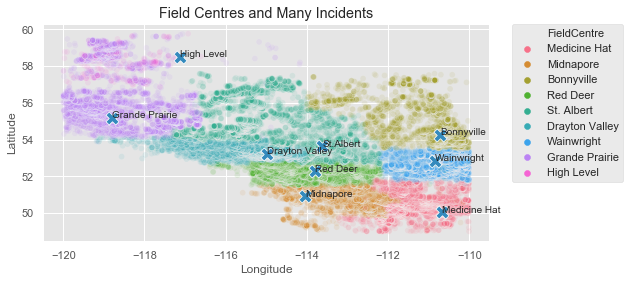

In [159]:
a = sns.scatterplot(x = df4['Longitude'], y = df4['Latitude'], hue = df4['FieldCentre'], alpha = 0.1)
b = sns.scatterplot(x = fields_pd['Longitude'], y = fields_pd['Latitude'], legend = 'full', marker = 'X', s = 169 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Field Centres and Many Incidents")
for i, txt in enumerate(fields_pd['Fields']):
    b.annotate(txt, (fields_pd['Longitude'][i], fields_pd['Latitude'][i]))
plt.show()

Are Field Centres the best locations do travel to their nearby incident areas? We will find out. Find 9 centroids from the dataset

In [111]:
kmeans = KMeans(n_clusters = 9)
location = df4[['Latitude', 'Longitude']]
labels = kmeans.fit_predict(location)
centroids = kmeans.cluster_centers_
centroids

array([[  53.2002692 , -114.505357  ],
       [  50.32823744, -111.5549583 ],
       [  55.4615998 , -118.86809425],
       [  54.7323466 , -110.86139888],
       [  54.48711508, -116.02928121],
       [  58.59666398, -118.84681779],
       [  52.68676261, -110.74016922],
       [  56.07808729, -114.91287707],
       [  51.67778225, -113.64406642]])

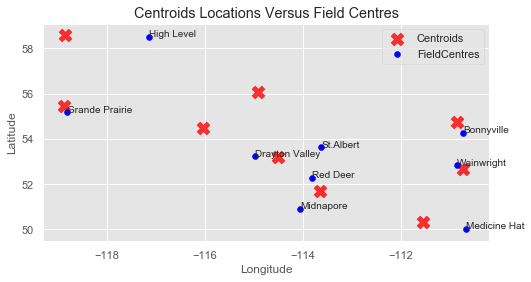

In [152]:
#Plot the 9 centroids
fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.scatter(centroids[:, 1], centroids[:, 0], c = 'red', marker = 'X', alpha = 0.8, s = 169)
d = ax.scatter(fields_pd['Longitude'], fields_pd['Latitude'], c = 'blue', marker = 'o')
ax.set_title('Centroids Locations Versus Field Centres')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.legend((c,d), ("Centroids", "FieldCentres"))
for i, txt1 in enumerate(fields_pd['Fields']):
    ax.annotate(txt1, (fields_pd['Longitude'][i], fields_pd['Latitude'][i]))


plt.show()


Grande Prairie, Drayton Valley, Bonnyville, Wainwright, Red Deer and Midnapore (Although Airdire could
be a better choice) are all the perfect locations for field centre to travel from. High Level, St. Albert and Medicine Hat are far away from the centroids and maybe need to find new cities/towns to replace them. More studies are needed on the new locations selected.

Although finding new towns/cities near coordinates[58.59666398, -118.84681779], [54.48711508, -116.02928121], [56.07808729, -114.91287707] should be a good idea but without investigating further these three new centroid locations cannot be the best choice for having on site trades and operators staying there. Other factors including the livable conditions, housings, families are also considered. 

Nonetheless, I am going to present the three centroid locations on Google Map and suggest other field centres.


At [58.59666398, -118.84681779] 
Looks like Rainbow Lake is the only closest town with population 600. High Level has population of 3000.
<img src="HighLevel.png" />

At [54.48711508, -116.02928121]
Whitecourt has population over 10000. Foxcreek has population of 2000.

<img src="Whitecourt.png" />

At [56.07808729, -114.91287707]
Slave lake has a population of 6600 which is the best choice for the field centre. First Nation land is surrounded by this location and consideration of negotiating with them is essential.

<img src="SlaveLake.png" />

That is all for now! Lots of information can be shown from the dataset. Other features such as affected environment, amount of pollution in each region could be displayed to understand more from the dataset.